#Exploratory Analysis

##Download and Install libraries

In [ ]:
!pip install emot
!pip install demoji
!pip install emoji

!pip install top2vec[sentence_encoders]
!pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 17 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 877 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 15.8 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=62d632ffc737f011b34037dc57e5baf18e9f9e21022ea92d8d50e129cbcac04b
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 6.8 MB/s 
     |████████████████████████████████| 5.2 MB 57.7 MB/s 
  Installing build dependencies ... done

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import emoji
import demoji
demoji.download_codes()

import json
import pandas as pd
import numpy as np
import regex as re
import pickle

import sys
import os

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from top2vec import Top2Vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  


## Import tweets

In [ ]:
#Connnect to google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## Import librabries

py_file_location = "/content/gdrive/MyDrive/NLP-exam"
sys.path.append(os.path.abspath(py_file_location))

import tweet_preprocessing as tp

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/content/gdrive/MyDrive/NLP-exam/tweet_preprocessing.py:20: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(105482, 6)
(107587, 6)
Original shape:(213069, 6)


/content/gdrive/MyDrive/NLP-exam/tweet_preprocessing.py:145: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Tweet = df.Tweet.str.replace(regex_list[i], replace_list[i])


,Tweet,Date,User,Type,PostID,InclKey,Hashtags,User_tags,Linked_to,RT,Tokenized_tweets
5500,fact checking always biased misleading created...,2021-04-23,KidKool4U,status,1386384766665216001,plandemic,NaN,[@FelixtheAXE],NaN,True,"[fact, checking, always, biased, misleading, c..."
5501,nothing amorphous thing orchestrated happen re...,2021-04-23,georgemas0nn,status,1386383648254054400,plandemic,"[#amorphous, #orchestrated, #agenda, #organic]",[@WenMoonTho],NaN,True,"[nothing, amorphous, thing, orchestrated, happ..."
5502,gotta research vaccine mask entire,2021-04-23,PowerSoula,status,1386382883254853636,plandemic,[#Plandemic],"[@Kareim30184380, @CryptoMessiah]",NaN,False,"[gotta, research, vaccine, mask, entire]"
5503,bill gate practice genocide africa absorb vita...,2021-04-23,dsyunior,status,1386382415380180992,plandemic,"[#Africa, #Plandemic, #EndGame]",NaN,[https://t.co/oV2To6KrEn],False,"[bill, gate, practice, genocide, africa, absor..."
5504,garbage click bait piece torched else tired fa...,2021-04-23,NVPatriotGirl,status,1386381145135144962,plandemic,"[#ufc, #UFC261, #fakenewsmedia, #propaganda, #...","[@reviewjournal, @danawhite]",[https://t.co/ILLtYkbBXC],False,"[garbage, click, bait, piece, torched, else, t..."
5505,wonder many oscar take home tonight,2021-04-23,ethan_douglas,status,1386378505236135937,plandemic,NaN,NaN,[https://t.co/SEopHdINWX],False,"[wonder, many, oscar, take, home, tonight]"
5506,covid used take away people right freedom powe...,2021-04-23,NoConclusion79,status,1386378282707390464,plandemic,NaN,NaN,[https://t.co/2ksHRgprP9],False,"[covid, used, take, away, people, right, freed..."
5507,look proof worldwide scam year test sold world,2021-04-23,JAZZYW257,status,1386378169549209601,plandemic,NaN,NaN,[https://t.co/xmS000Mwjj],False,"[look, proof, worldwide, scam, year, test, sol..."
5508,family member daycare working month child snif...,2021-04-23,ganais_anais,status,1386377427019051014,plandemic,"[#SlipperySlope, #COVID19, #Plandemic]","[@markjam88463456, @existentialrest, @shocking...",NaN,False,"[family, member, daycare, working, month, chil..."
5509,hoax boris struggle sell longer,2021-04-23,Fifi_Borgia,status,1386377425358147584,plandemic,NaN,[@darylpeagram],NaN,True,"[hoax, boris, struggle, sell, longer]"


# Preprocessing

In [ ]:
#create plandemic and scamdemic list of subdirecvtories
b = "\'1WwYhT1PPii8x-O4GLnMm54E9DnMrcTED\'"
plandemic_subfolders = tp.matching_items_in_directory(b, 'plandemic')
scamdemic_subfolders = tp.matching_items_in_directory(b, 'scamdemic')

#clean and create dataset for each context
df_plandemic = tp.clean_combine_subfolder_tweets(plandemic_subfolders)
df_scamdemic = tp.clean_combine_subfolder_tweets(scamdemic_subfolders)

#separate dataframes
print(df_plandemic.shape)
print(df_scamdemic.shape)

#combined dataframes
df = pd.concat([df_plandemic, df_scamdemic], ignore_index=True)
display(df)

(105482, 6)
(107587, 6)


,Tweet,Date,User,Type,PostID,InclKey
0,RT @libertytarian: 1st day of pastor's trial f...,2021-04-30,SyrianArchangle,status,1390250830956318721,plandemic
1,RT @sjaanie123: Kijk uit voor de gevaccineerde...,2021-04-30,SaskiaDev,status,1390250693534097408,plandemic
2,@Bameron2 You’re boyfriend must be proud of yo...,2021-04-30,Phoenix1783,status,1390250538026086400,plandemic
3,Kijk uit voor de gevaccineerden mensen! #COVID...,2021-04-30,sjaanie123,status,1390249938118905856,plandemic
4,"RT @BartosVl: Covid inženýři z celého světa, j...",2021-04-30,Lubomr12663547,status,1390249162176974848,plandemic
...,...,...,...,...,...,...
213064,"RT @SJJB55: Sept 2020, sat in our village (pop...",2021-04-21,mherbert617,status,1384048634195431432,scamdemic
213065,@BhupinderJaryal This is ..scamdemic,2021-04-21,SharmaSandeep41,status,1384047994165628932,scamdemic
213066,"RT @SJJB55: Sept 2020, sat in our village (pop...",2021-04-21,louisrossilevy,status,1384047719354753025,scamdemic
213067,"Guess what , nobody's gonna get the money 🤣😂\n...",2021-04-21,DanielScoland,status,1384047365724663810,scamdemic


In [ ]:
def preprocess_tweets(df):
  ''' Calling preprocessing steps to handle tweets before it is fed into model. '''
  df = tp.emojis_to_text(df)
  df = tp.extract_tweet_features(df)
  df_clean = tp.clean_tweets(df)
  df = tp.concentrate_tweets(df_clean)
  df.Tweet = df.Tweet.str.replace(r'\b(\w{1,2})\b', '') 
  df = tp.tokenize_tweets(df)

  return df, df_clean

df, df_clean = preprocess_tweets(df)
df = tp.handle_duplicates_nans(df)
#df.Tokenized_tweets.str.replace(r'\b(\w{1,2})\b', '')
df = df.reset_index()
display(df)

/content/gdrive/MyDrive/NLP-exam/tweet_preprocessing2.py:145: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Tweet = df.Tweet.str.replace(regex_list[i], replace_list[i])
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Tweet,Date,User,Type,PostID,InclKey,Hashtags,User_tags,Linked_to,RT,Tokenized_tweets
16,woman record eyewitness report hype time india...,2021-04-30,MARCELODELAVE15,status,1390241744445444097,plandemic,"[#India, #Plandemic, #InformedConsent]",[@libertytarian],NaN,True,"[woman, record, eyewitness, report, hype, time..."
19,errant scientist criminal medium outlet prolif...,2021-04-30,stephen_keena,status,1390237878500876296,plandemic,NaN,[@worldtreeman],NaN,True,"[errant, scientist, criminal, medium, outlet, ..."
40,shop class high school shop teacher walked for...,2021-04-30,GingrichVera,status,1390227188851556353,plandemic,NaN,[@tr6_guy],NaN,False,"[shop, class, high, school, shop, teacher, wal..."
50,luxembourg anti covid19 restriction happening ...,2021-04-30,BiankaStettler,status,1390224859163209729,plandemic,NaN,[@umustrise],NaN,True,"[luxembourg, anti, covid, 19, restriction, hap..."
81,sorry spelt wrong thumb upthumbs upthumbs,2021-04-30,UpintDales,status,1390214269443133441,plandemic,NaN,"[@Craigsmiffy6969, @reddevil68, @UpintDales]",NaN,True,"[sorry, spelt, wrong, thumb, upthumbs, upthumbs]"
...,...,...,...,...,...,...,...,...,...,...,...
213063,hundred point crock mass continuing display pa...,2021-04-21,SylviaEdge3,status,1384049848572276743,scamdemic,NaN,[@samasjapi],NaN,True,"[hundred, point, crock, mass, continuing, disp..."
213064,sept village local know covid death anybody ca...,2021-04-21,mherbert617,status,1384048634195431432,scamdemic,NaN,[@SJJB55],NaN,True,"[sept, village, local, know, covid, death, any..."
213066,sept village local know covid death anybody ca...,2021-04-21,louisrossilevy,status,1384047719354753025,scamdemic,NaN,[@SJJB55],NaN,True,"[sept, village, local, know, covid, death, any..."
213067,guess nobody gonna money rolling floor laughin...,2021-04-21,DanielScoland,status,1384047365724663810,scamdemic,"[#NoVaccinePassport, #nwo, #scamdemic, #plande...",NaN,[https://t.co/9Wg5cPGalz],False,"[guess, nobody, gonna, money, rolling, floor, ..."


# Word cloud

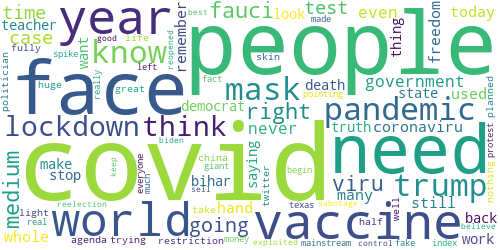

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed tweets together.
long_string = ' '.join(list(df['Tokenized_tweets'].str.join(" ").values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", collocations=False, relative_scaling = 0.5, max_words=1000, width = 500, height = 250, repeat = False, contour_width=3, contour_color='steelblue', min_font_size = 7)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Trend analysis of hashtags

In [ ]:
#combine lists to strings
for i in range(len(df["Hashtags"])):
  if type(df["Hashtags"][i]) is list:
    df["Hashtags"][i] = " ".join(map(str, df.Hashtags[i]))
  else:
    continue

df.Hashtags = df.Hashtags.str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# count all words 
hashtags = df.Hashtags.str.split(expand=True).stack().value_counts() # we have 13456 unique words

hashtags.head(50) # the most common hashtags related to covid conspiracies

#scamdemic                     19663
#plandemic                     15439
#covid19                        4142
#bihar_needs_teachers           2880
#covid                          1664
#nwo                            1640
#wakeup                         1164
#covidiots                      1024
#coronavirus                     903
#vaccine                         847
#greatreset                      745
#freedom                         715
#truth                           646
#fauci                           643
#covid1984                       630
#covidhoax                       626
#crimesagainsthumanity           599
#justsayno                       554
#hoax                            550
#agenda21                        548
#novaccinepassport               544
#canada                          533
#novaccinepassports              513
#pandemic                        509
#maskoff                         490
#covidvaccine                    479
#fauciemails                     472
#

In [ ]:
all_hashtags = df.Hashtags.str.split(expand=True).stack()
# remove multiindex
all_hashtags.index = all_hashtags.index.droplevel(-1)
all_hashtags.name= 'hashtags'

# join Series to df source
df_new = (df.join(all_hashtags))

# aggregate by date and hashtag
hashtags_time = df_new.groupby(['Date', 'hashtags']).size().reset_index(name='count')


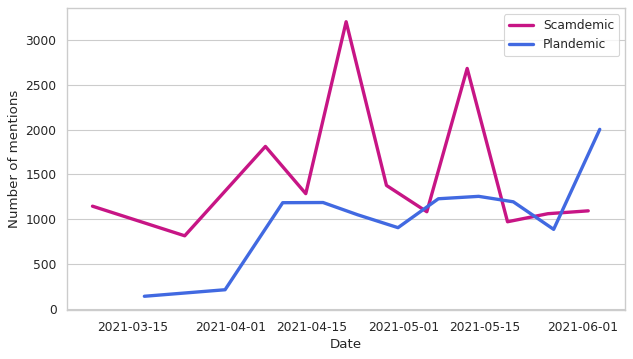

In [ ]:
# take the right dates of collection 
scamdemic = hashtags_time[hashtags_time["hashtags"] == "#scamdemic"].iloc[::2]
plandemic = hashtags_time[hashtags_time["hashtags"] == "#plandemic"].iloc[1::2]

# set a style
sns.set_style("whitegrid")

# create an object 
fig = plt.figure(figsize=(9, 5), dpi=80)
ax = fig.subplots()
ax.grid(axis='x')

# build a graph
plt.plot(scamdemic["Date"], scamdemic["count"], color='mediumvioletred', linewidth = 3)
plt.plot(plandemic["Date"], plandemic["count"], color = "royalblue", linewidth = 3)
plt.xlabel("Date")
plt.ylabel("Number of mentions")
plt.legend(["Scamdemic", "Plandemic"])


In [ ]:
def trend_analysis(lst, dataframe):
  """ input: list of hashtags, dataframe where data is taken from
      output: a line graph for each hashtags """

  colors = ['mediumvioletred', "royalblue", "navy", "darkgreen", "darkgoldenrod"]
  # set a style
  sns.set_style("whitegrid")

  # create an object 
  fig = plt.figure(figsize=(9, 5), dpi=80)
  ax = fig.subplots()
  ax.grid(axis='x')

  # iterate through the list of hashtags
  for i in range(len(lst)):
    new = dataframe[dataframe["hashtags"] == lst[i]]
    # build graphs
    plt.plot(new["Date"], new["count"], linewidth = 3, color = colors[i])

  plt.xlabel("Date")
  plt.ylabel("Number of mentions")
  plt.legend(lst)

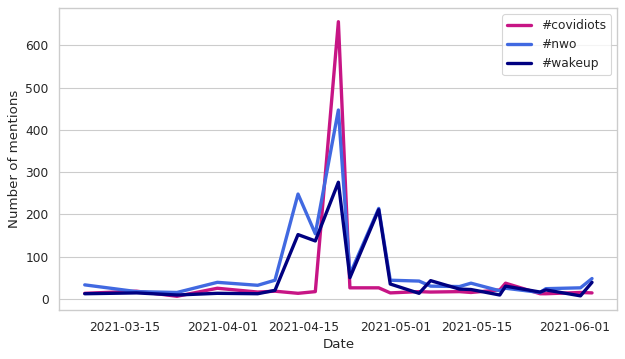

In [ ]:
trend_analysis(['#covidiots', '#nwo', '#wakeup'], hashtags_time)